# AIRLINES ANALYSIS

STEP 1 : IMPORT THE IMPORTANT LIBRARY WHICH WILL HELP IN ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st

STEP 2: LOAD THE AIRLINES EXCEL FILE IN PANDAS AND ALSO ASSIGN IT INTO VARIABLES SO THAT IT IS EASY TO ACCESS.

In [2]:
Airlines=pd.read_excel("C:\\Users\\user\\OneDrive\\Desktop\\madrid software\\MADRID CLASSES\\Data set\\Airlines data.xlsx",engine="openpyxl")
Airlines.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


STEP 3: PASS THE BASIC QUERRY TO FILTER THE INFORMATION FROM THE DATASET.

In [3]:
Airlines.shape

(10683, 11)

In [4]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
Airlines.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
[Airlines.dtypes]

[Airline            object
 Date_of_Journey    object
 Source             object
 Destination        object
 Route              object
 Dep_Time           object
 Arrival_Time       object
 Duration           object
 Total_Stops        object
 Additional_Info    object
 Price               int64
 dtype: object]

In [7]:
Airlines.describe(include="object").T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


Now findout is there any null value in any column or row?

In [8]:
Airlines.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
Airlines.Total_Stops.fillna(Airlines.Total_Stops.mode()[0],inplace=True)

In [10]:
Airlines.Route.fillna(Airlines.Route.mode()[0], inplace=True)

In [11]:
Airlines.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

From the above enquiry we can conclude, we donot have any null value. Now we can proceed to Analysis. 

# ANALYSIS OF AIRLINES DATASET :

In [12]:
Airlines.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Now from the above table we can compute that the index is not done required in terms of serial number so we can make date of Journey column as our index and also sort them accordingly to get proper outlook of the data.

In [13]:
Airlines.set_index(Airlines["Date_of_Journey"],inplace=True)
Airlines.drop(columns=['Date_of_Journey'],inplace=True)

In [14]:
Airlines.sort_values("Date_of_Journey")


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_of_Journey,,,,,,,,,,
01/03/2019,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
01/03/2019,Air India,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
01/03/2019,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
01/03/2019,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
01/03/2019,IndiGo,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649
...,...,...,...,...,...,...,...,...,...,...
9/06/2019,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,09:35,22:05,12h 30m,1 stop,No info,14676
9/06/2019,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,20:25,21:05 10 Jun,24h 40m,1 stop,In-flight meal not included,10539
9/06/2019,Vistara,Kolkata,Banglore,CCU → DEL → BLR,20:20,23:25 10 Jun,27h 5m,1 stop,No info,8085


# SOME OF THE INSIGHTS FOR AIRLINES DATASETS

# INSIGHT-1: From the above data findout the unique value in the date of Journey column?

In [17]:
Airlines["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

# From the data we can conclude that the data is of same year i.e 2019, so we can seperate the day and month to make the data more effective.

In [18]:
Airlines['day']=pd.to_datetime(Airlines['Date_of_Journey']).dt.day
Airlines['month']=pd.to_datetime(Airlines['Date_of_Journey']).dt.month
Airlines.drop(columns=['Date_of_Journey'],inplace=True)

In [19]:
Airlines.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


# INSIGHT 2: From the above data we can also conclude that there are some columns where New Delhi is written so we can change it to Delhi.

In [20]:
Airlines["Destination"]=Airlines["Destination"].replace({"New Delhi":"Delhi"})
Airlines.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


# INSIGHT 3: From the above table instead of taking two column of Source and Destination we could make the column of Source to Destination?

In [21]:
Airlines["Source to Destination"]=Airlines["Source"]+ "-" + Airlines["Destination"]
Airlines.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Banglore-Delhi
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,Kolkata-Banglore


# Also we can drop the column of Dep_time and Arrival_Time and make one column of Time.

In [22]:
Airlines["Arrival_Time"]=Airlines["Arrival_Time"].str.replace("Mar"," ")
Airlines["Arrival_Time"]=Airlines["Arrival_Time"].str.replace("Apr"," ")
Airlines["Arrival_Time"]=Airlines["Arrival_Time"].str.replace("May"," ")
Airlines["Arrival_Time"]=Airlines["Arrival_Time"].str.replace("Jun"," ")

In [23]:
Airlines["Time"]=Airlines["Dep_Time"] + "---" + Airlines["Arrival_Time"]
Airlines

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22,2h 50m,non-stop,No info,3897,24,3,Banglore-Delhi,22:20---01:10 22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,Kolkata-Banglore,05:50---13:15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10,19h,2 stops,No info,13882,6,9,Delhi-Cochin,09:25---04:25 10
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,Kolkata-Banglore,18:05---23:30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,Banglore-Delhi,16:50---21:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,Kolkata-Banglore,19:55---22:25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,Kolkata-Banglore,20:45---23:20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,Banglore-Delhi,08:20---11:20
10681,Vistara,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,Banglore-Delhi,11:30---14:10


In [24]:
Airlines.groupby("Airline")["Time"].agg(["min","max"])

,min,max
Airline,,
Air Asia,04:55---07:45,23:55---02:45 28
Air India,00:30---08:45,23:00---19:15 25
GoAir,05:45---13:20,23:30---07:45 25
IndiGo,00:25---03:15,23:30---04:35 28
Jet Airways,00:20---04:25 10,23:05---19:45 28
Jet Airways Business,05:45---10:45,20:05---04:25 07
Multiple carriers,00:20---07:40,19:00---01:35 28
Multiple carriers Premium economy,06:00---12:35,19:00---01:35 22
SpiceJet,05:45---07:05,22:45---00:15 28


# INSIGHT-4: Dropping the uneccessary columns not required to us

In [25]:
Airlines.drop(columns=["Source", "Destination", "Route", "Dep_Time","Arrival_Time"], inplace=True)


In [26]:
Airlines.head(2)

,Airline,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
0,IndiGo,2h 50m,non-stop,No info,3897,24,3,Banglore-Delhi,22:20---01:10 22
1,Air India,7h 25m,2 stops,No info,7662,5,1,Kolkata-Banglore,05:50---13:15


# INSIGHT-5 : Findout the unique value in the Airlines column and find the price of minimum and maximum ticket offered by the Airlines?

In [27]:
Airlines.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [28]:
Airlines.groupby("Airline")["Price"].agg(["min","max"])

,min,max
Airline,,
Air Asia,3383,13774
Air India,2050,31945
GoAir,3398,22794
IndiGo,2227,22153
Jet Airways,1840,54826
Jet Airways Business,46490,79512
Multiple carriers,5797,36983
Multiple carriers Premium economy,9845,14629
SpiceJet,1759,23267


# INSIGHT-6 : Give the details of those passenger who has paid the higest and lowest price of the ticket?

In [29]:
Airlines.iloc[np.where(Airlines["Price"]==max(Airlines["Price"]))]

,Airline,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
2924,Jet Airways Business,5h 40m,1 stop,Business class,79512,3,1,Banglore-Delhi,05:45---11:25


In [30]:
Airlines.iloc[np.where(Airlines["Price"]==min(Airlines["Price"]))]

,Airline,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
4066,SpiceJet,1h 25m,non-stop,No info,1759,21,3,Mumbai-Hyderabad,22:45---00:10 22
4274,SpiceJet,1h 25m,non-stop,No info,1759,27,3,Mumbai-Hyderabad,22:45---00:10 28
4839,SpiceJet,1h 30m,non-stop,No info,1759,4,3,Mumbai-Hyderabad,22:45---00:15 02
10513,SpiceJet,1h 20m,non-stop,No info,1759,27,3,Mumbai-Hyderabad,05:45---07:05


# INSIGHT-7: Find out which Airlines has maximum or minimum Source to Destination?

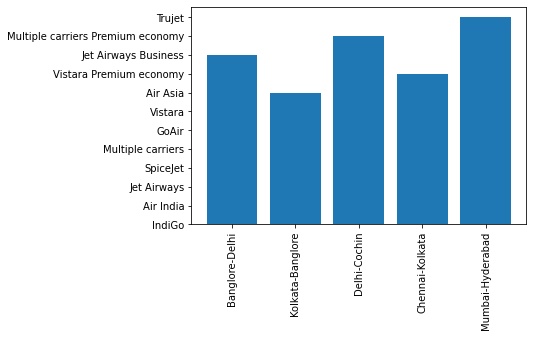

In [31]:
plt.bar(Airlines["Source to Destination"],Airlines["Airline"]);
plt.xticks(rotation=90);

CONCLUSION : From the above bar chart we can conclude the following points.

1. Maximum flight departured from "Mumbai to hyderabad" and the Airline was "Trujet".
2. Minimum Flight which was departured from "Kolkata to Banglore Airport" and the Airline was "Air Asia".

# INSIGHT-8: Findout the maximum duration and minimum duration of Airline?

In [32]:
Airlines.groupby("Airline")["Duration"].agg(["min","max"])

,min,max
Airline,,
Air Asia,10h 25m,9h 50m
Air India,10h,9h 5m
GoAir,2h 35m,9h 15m
IndiGo,10h 15m,9h 35m
Jet Airways,10h,9h 50m
Jet Airways Business,4h 40m,8h 20m
Multiple carriers,10h,9h 5m
Multiple carriers Premium economy,10h 20m,9h 30m
SpiceJet,1h 20m,8h 5m


# INSIGHT-9: Findout some outliers inrespect from Source to Destination according to month and day?

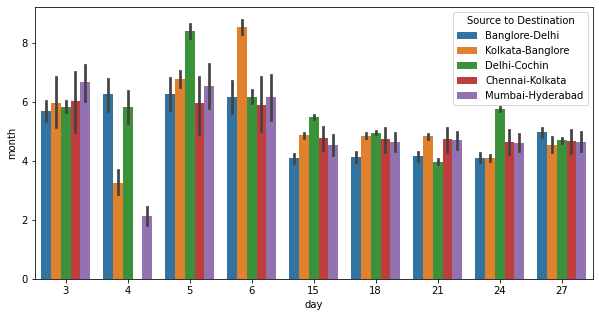

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x="day",y="month",data=Airlines, hue="Source to Destination");

Conclusion:
    
from the chart we can conclude that Chennai-kolkata Airport has maximum outliers.

# INSIGHT-10 : findout some outliers inrespect of the price of the Airlines?

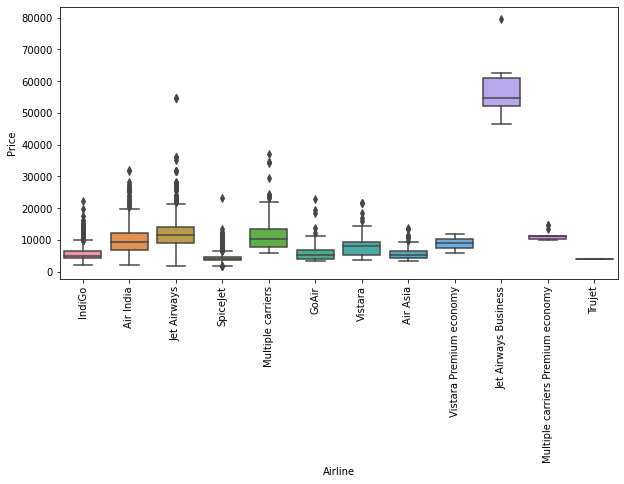

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Airline", y="Price", data=Airlines);
plt.xticks(rotation=90);

# INSIGHT-11: Findout the filght inrespect of their route in particular month?

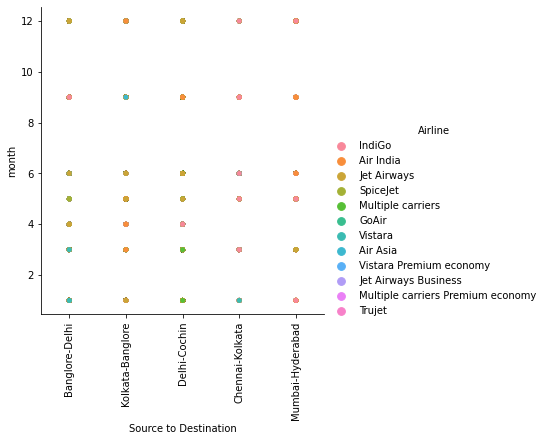

In [35]:
sns.catplot(x="Source to Destination",y="month", data=Airlines, hue="Airline",jitter=False);
plt.xticks(rotation=90);

# FINDING OUT THE UNIQUE VALUE IN THE TOTAL STOP.

In [36]:
Airlines.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

# FROM THE ABOVE TABLE WE CAN CHANGE 1 STOP AS 1 AND SO ON?

In [37]:
Airlines["Total_Stops"]=Airlines["Total_Stops"].map({"non-stop":"0", "1 stop":"1", "2 stops":"2","3 stops":"3","4 stops":"4"}) 
Airlines.head(2)

,Airline,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
0,IndiGo,2h 50m,0,No info,3897,24,3,Banglore-Delhi,22:20---01:10 22
1,Air India,7h 25m,2,No info,7662,5,1,Kolkata-Banglore,05:50---13:15


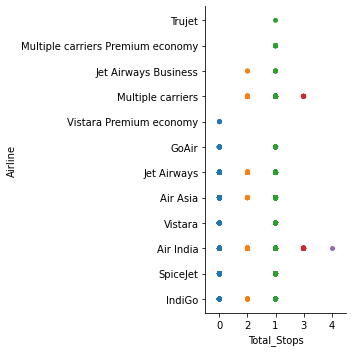

In [38]:
sns.catplot(x="Total_Stops",y="Airline", data=Airlines,kind="strip",jitter=False);


# FINDING OUT THE UNIQUE VALUE IN THE ADDITIONAL INFO COLUMN.

In [39]:
Airlines.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

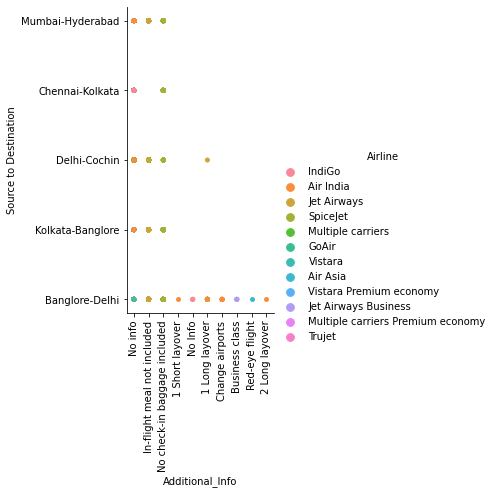

In [40]:
sns.catplot(x="Additional_Info",y="Source to Destination", data=Airlines, hue="Airline",jitter=False);
plt.xticks(rotation=90);

# INSIGHT-12 : Findout those flight which has two long layover?

In [41]:
Airlines.iloc[np.where(Airlines["Additional_Info"]=="2 Long layover")]

,Airline,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
10511,Air India,26h 40m,2,2 Long layover,26480,3,1,Banglore-Delhi,06:45---09:25 02


In [42]:
Airlines.iloc[np.where(Airlines["Additional_Info"]=="Business class")]

,Airline,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
2924,Jet Airways Business,5h 40m,1,Business class,79512,3,1,Banglore-Delhi,05:45---11:25
3032,Jet Airways,6h 30m,1,Business class,28097,3,1,Banglore-Delhi,05:50---12:20
5372,Jet Airways Business,6h 40m,1,Business class,62427,3,1,Banglore-Delhi,05:45---12:25
10364,Jet Airways Business,4h 40m,1,Business class,57209,3,1,Banglore-Delhi,09:45---14:25


# Lets check wheather there is corelation between the price according to day and month.

In [44]:
Cor=Airlines.corr()

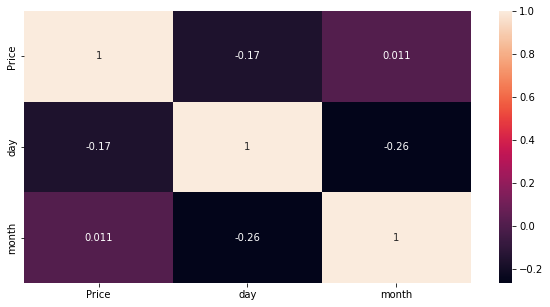

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(Cor,annot=True);

In [46]:
Airlines.head(5)

,Airline,Duration,Total_Stops,Additional_Info,Price,day,month,Source to Destination,Time
0,IndiGo,2h 50m,0,No info,3897,24,3,Banglore-Delhi,22:20---01:10 22
1,Air India,7h 25m,2,No info,7662,5,1,Kolkata-Banglore,05:50---13:15
2,Jet Airways,19h,2,No info,13882,6,9,Delhi-Cochin,09:25---04:25 10
3,IndiGo,5h 25m,1,No info,6218,5,12,Kolkata-Banglore,18:05---23:30
4,IndiGo,4h 45m,1,No info,13302,3,1,Banglore-Delhi,16:50---21:35


# Check the degree of Independence wheather Airlines selection depends on where person is going?

In [47]:
Obs_table=pd.crosstab(Airlines["Airline"],Airlines["Source to Destination"])
Obs_table

Source to Destination,Banglore-Delhi,Chennai-Kolkata,Delhi-Cochin,Kolkata-Banglore,Mumbai-Hyderabad
Airline,,,,,
Air Asia,89,0,80,150,0
Air India,332,25,747,512,136
GoAir,93,0,76,25,0
IndiGo,523,184,705,445,196
Jet Airways,788,0,1586,1256,219
Jet Airways Business,4,0,2,0,0
Multiple carriers,0,0,1196,0,0
Multiple carriers Premium economy,0,0,13,0,0
SpiceJet,181,128,87,300,122


In [49]:
v=st.chi2_contingency(Obs_table)
if v[1]<0.05:
    print("Reject null hypothesis which means they are independent to one another. ")
    
else:
    print("Accept null hypothesis which means they are dependent to one another. ")

Reject null hypothesis which means they are independent to one another. 


# FINAL INSIGHT: CHECK THE AVAILABILITY OR NUMBER OF FLIGHT?

In [50]:
df=Airlines.groupby(["Source to Destination"])["Airline"].value_counts()
df

Source to Destination  Airline                          
Banglore-Delhi         Jet Airways                           788
                       IndiGo                                523
                       Air India                             332
                       Vistara                               185
                       SpiceJet                              181
                       GoAir                                  93
                       Air Asia                               89
                       Jet Airways Business                    4
                       Vistara Premium economy                 2
Chennai-Kolkata        IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Air India                              25
                       Vistara Premium economy                 1
Delhi-Cochin           Jet Airway